# Transfer Learning with Imagenet

Keras library provides the off the shelf CNNs that have been pre-trained on the Imagenet dataset. There a quiet a few of them such as VGG16, VGG19, ResNet50, Inception V3 and Xception.

Today our focus is on using VGG16 network architecture. This architecture is introduced by Simonyan and Zisserman in "Very Deep Convolutional Networks for Large Scale Image Recognition"

In [11]:
import numpy as np
from vgg16 import VGG16
from keras.preprocessing import image
from imagenet_utils import preprocess_input, decode_predictions

model = VGG16(include_top=True, weights='imagenet')

#Visualize the break down of the model

model.summary()

#Visualize other parameters of the model like trainable,name of the layer etc...
model.layers[-1].get_config()
model.layers[-2].get_config()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'bias_regularizer': None,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'name': 'fc2',
 'trainable': True,
 'units': 4096,
 'use_bias': True}

Input image shape: (1, 224, 224, 3)
Predicted: [[('n02099712', 'Labrador_retriever', 0.32839385), ('n02090379', 'redbone', 0.15649658), ('n02087394', 'Rhodesian_ridgeback', 0.13488932), ('n02808304', 'bath_towel', 0.077632807), ('n15075141', 'toilet_tissue', 0.044041939)]]


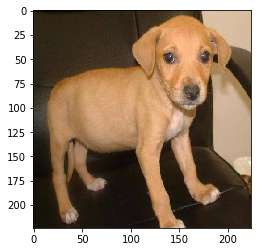

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
img_path = 'demo//dog01.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

plt.imshow(img)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

# CNN as a feature extractor

In [13]:
model = VGG16(weights='imagenet', include_top=False)

model.summary()
model.layers[-1].get_config()

img_path = 'demo//dog01.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)

features1=features.reshape(-1,25088)

print(features.shape)

print(features1.shape)

print(features1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________